In [1]:
############ Plot Box and Whisker Plots of Percent of ###################################
##### Suspended Sediment that is Locally Suspended Over Time ############################
# The purpose of this script is to make plots that have one box and whisker plot for 
# each shelf section that has the range of percentages of locally resuspended 
# sediment in that section over time. 
#
# Notes:
# - This leaves out the rivers that are no longer in the 2020 model
#   runs that use Blaskey river data 
#########################################################################################

In [2]:
# Load in the packages 
import numpy as np
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import transforms 
from matplotlib import cm, ticker
from glob import glob
import cmocean
#import matplotlib.ticker as tick
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.patches as mpatches


In [3]:
# Set a universal fontsize
fontsize = 20 # 25

# Set the tick size for all plots
matplotlib.rc('xtick', labelsize=fontsize) 
matplotlib.rc('ytick', labelsize=fontsize)

# Prevent tick labels from overlapping
matplotlib.rcParams['xtick.major.pad'] = 10 # 12
matplotlib.rcParams['ytick.major.pad'] = 10 # 12


In [4]:
# Load in the grid
grid = xr.open_dataset('/projects/brun1463/ROMS/Kakak3_Alpine/Include/KakAKgrd_shelf_big010_smooth006.nc')
#grid = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Kaktovik_Alaska_2019/Code/Grids/KakAKgrd_shelf_big010_smooth006.nc') # UPDATE PATH


# Pull out some dimensions
eta_rho_len = len(grid.eta_rho)
xi_rho_len = len(grid.xi_rho)
s_rho_len = int(20)
Nbed_len = 11

In [5]:
# Multiply by masks to make land appear 
# Make it so land will appear
temp_mask = grid.mask_rho.copy()
temp_mask = np.where(temp_mask==0, np.nan, temp_mask)

In [6]:
# Load in the rho masks 
mask_rho_nan = xr.open_dataset('/projects/brun1463/ROMS/Kakak3_Alpine/Scripts_2/Analysis/Nudge_masks/nudge_mask_rho_ones_nans.nc') # UPDATE PATH
mask_rho_zeros = xr.open_dataset('/projects/brun1463/ROMS/Kakak3_Alpine/Scripts_2/Analysis/Nudge_masks/nudge_mask_rho_zeros_ones.nc')
#mask_rho_nan = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Kaktovik_Alaska_2019/Code/Nudge_masks/nudge_mask_rho_ones_nans.nc')
#mask_rho_zeros = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Kaktovik_Alaska_2019/Code/Nudge_masks/nudge_mask_rho_zeros_ones.nc')


In [7]:
# Load in the river forcing file 
# -- Aggregated --
#river_frc = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Beaufort_Shelf_Rivers_proj_002/Model_Input/Rivers/river_forcing_file_beaufort_shelf_13rivs_13seabed_radr_data_001.nc')
# (2020)
river_frc = xr.open_dataset('/projects/brun1463/ROMS/Beaufort_Shelf_Rivers_Alpine_002/Include/river_forcing_file_beaufort_shelf_10rivs_13seabed_blaskey_data_sagDSS3_rating_001.nc')
# -- Unaggregated (it is the same for now) --
#river_frc = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Beaufort_Shelf_Rivers_proj_002/Model_Input/Rivers/river_forcing_file_beaufort_shelf_13rivs_13seabed_radr_data_003.nc')

In [8]:
# Make a list of labels in order
labels_tmp = ['Kalikpik', 'Fish Creek', 'Colville', 'Sakonowyak', 
          'Kuparuk', 'Putuligayuk', 'Sagavanirktok', 'Staines', 'Canning', 'Katakturuk', 'Hulahula',
          'Jago', 'Siksik', 'Section 1', 'Section 2', 'Section 3', 'Section 4',
          'Section 5', 'Section 8', 'Section 9', 'Section 10',
          'Section 11', 'Section 12']

labels_tmp2 = ['Kalikpik', 'Colville', 'Sagavanirktok', 'Fish Creek', 'Sakonowyak', 
          'Kuparuk', 'Putuligayuk', 'Staines', 'Canning', 'Katakturuk', 'Hulahula',
          'Jago', 'Siksik', 'Section 1', 'Section 2', 'Section 3', 'Section 4',
          'Section 5', 'Section 8', 'Section 9', 'Section 10',
          'Section 11', 'Section 12']

labels_all_13rivs = ['Kalikpik', 'Fish Creek', 'Colville', 'Sakonowyak', 
          'Kuparik', 'Putuligayuk', 'Sagavanirktok', 'Staines', 'Canning', 'Katakturuk', 'Hulahula',
          'Jago', 'Siksik', 'Section 1', 'Section 2', 'Section 3', 'Section 4',
          'Section 5', 'Section 6', 'Section 7', 'Section 8', 'Section 9', 'Section 10',
          'Section 11', 'Section 12', 'Section 13']

# Same as above but with Putuligayuk, Sakonowyak, and Siksik removed
labels_all = ['Kalikpik', 'Fish Creek', 'Colville', 
          'Kuparik', 'Sagavanirktok', 'Staines', 'Canning', 'Katakturuk', 'Hulahula',
          'Jago', 'Section 1', 'Section 2', 'Section 3', 'Section 4',
          'Section 5', 'Section 6', 'Section 7', 'Section 8', 'Section 9', 'Section 10',
          'Section 11', 'Section 12', 'Section 13']


# Make a list of all colors in order (rivers then seabed sections)
#colors_tmp = ['r', 'brown', 'deepskyblue', 'orange', 'green', 'b', 'dodgerblue', 'gold',
 #               'darkorange', 'aquamarine', 'blueviolet', 'magenta', 'deeppink', 'cornflowerblue', 
  #              'lightsteelblue', 'sandybrown', 'forestgreen', 'orangered',
   #             'hotpink', 'pink', 'lightgray', 'yellowgreen',
     #                            'mediumturquoise']

# =============================================================================
# colors_all = ['r', 'brown', 'deepskyblue', 'orange', 'green', 'b', 'dodgerblue', 'gold',
#                 'darkorange', 'aquamarine', 'blueviolet', 'magenta', 'deeppink', 'cornflowerblue', 
#                 'lightsteelblue', 'sandybrown', 'forestgreen', 'orangered',
#                 'lightsalmon', 'sienna', 'hotpink', 'pink', 'lightgray', 'yellowgreen',
#                                  'mediumturquoise', 'powderblue' ]
# =============================================================================

# Make a list of seabed colors
seabed_colors = ['cornflowerblue', 'lightsteelblue', 'sandybrown', 'forestgreen', 'orangered',
                 'lightsalmon', 'sienna', 'hotpink', 'pink', 'lightgray', 'yellowgreen',
                 'mediumturquoise', 'powderblue']

# Make a list of colors for the rivers 
river_colors = ['r', 'brown', 'deepskyblue', 'orange', 'green', 'b', 'dodgerblue', 'gold',
                'darkorange', 'aquamarine', 'blueviolet', 'magenta', 'deeppink']

# Make list of colors to use for plots
seabed_section_colors = ['#D1C8FB', '#F4B6D3', '#FFC8B0', '#FFE3B2', '#A190F4', 
                         '#E86DA6', '#FF925F', '#FFC863', '#785EF0', '#DC267F', 
                         '#FF6100', '#FFB000','#6490FF']
#river_marker_colors = ['#FC440F', '#00A6A6', '#5EF38C', '#26532B', '#0115F5',
               #        '#9C00A8', '#F43ECF', '#F5ED00']
river_marker_colors = ['#FC440F', '#F5ED00', '#5EF38C', '#26532B', '#F43ECF', '#9C00A8',
                       '#0115F5', '#00A6A6', '#AB64EB', '#D44179', '#08E0E3', '#B27009', '#EA8D40']

# New colors tmp
# River Order: Kalikpik, Fish Creek, Colville, Sakonowyak, Kuparuk, Putuligayuk, 
# Sagavanirktok, Staines, Canning, Katakturuk, Hulahula, Jago, Siksik, 
# Section 1 ..., Section 13 (sections are in order)
colors_tmp_13rivs = ['#FC440F', '#F5ED00', '#5EF38C', '#26532B', '#F43ECF', '#9C00A8',
              '#0115F5', '#00A6A6', '#AB64EB', '#D44179', '#08E0E3', '#B27009', '#EA8D40',
              '#D1C8FB', '#F4B6D3', '#FFC8B0', '#FFE3B2', '#A190F4', 
              '#E86DA6', '#FF925F', '#FFC863', '#785EF0', '#DC267F',
              '#FF6100', '#FFB000','#6490FF'] 

# Same as above but with Putuligayuk, Sakonowyak, and Siksik removed 
colors_tmp = ['#FC440F', '#F5ED00', '#5EF38C', '#F43ECF',
              '#0115F5', '#00A6A6', '#AB64EB', '#D44179', '#08E0E3', '#B27009',
              '#D1C8FB', '#F4B6D3', '#FFC8B0', '#FFE3B2', '#A190F4', 
              '#E86DA6', '#FF925F', '#FFC863', '#785EF0', '#DC267F',
              '#FF6100', '#FFB000','#6490FF'] 


# New colors tmp2 - with colors for sections 6, 7, 13 removed since we are ignoring those for now
colors_tmp2 = ['#FC440F', '#F5ED00', '#5EF38C', '#26532B', '#F43ECF', '#9C00A8',
              '#0115F5', '#00A6A6', '#AB64EB', '#D44179', '#08E0E3', '#B27009', '#EA8D40',
              '#D1C8FB', '#F4B6D3', '#FFC8B0', '#FFE3B2', '#A190F4', 
              '#FFC863', '#785EF0', '#DC267F',
              '#FF6100', '#FFB000']


In [9]:
# Load in the post-processed output
riv_sed_percent_agg = xr.open_dataset('/projects/brun1463/ROMS/Beaufort_Shelf_Rivers_Alpine_002/Scripts/Analysis/Percent_river_suspended_sed_regions/percent_river_suspended_sed_over_time_in_regions_aggregated.nc') 

In [10]:
riv_sed_percent_agg

<xarray.Dataset>
Dimensions:             (ocean_time: 738)
Coordinates:
  * ocean_time          (ocean_time) datetime64[ns] 2020-07-01T01:00:00 ... 2...
Data variables: (12/40)
    percent_0_10m_kal   (ocean_time) float64 ...
    percent_10_20m_kal  (ocean_time) float64 ...
    percent_20_30m_kal  (ocean_time) float64 ...
    percent_30_60m_kal  (ocean_time) float64 ...
    percent_0_10m_col   (ocean_time) float64 ...
    percent_10_20m_col  (ocean_time) float64 ...
    ...                  ...
    percent_20_30m_hul  (ocean_time) float64 ...
    percent_30_60m_hul  (ocean_time) float64 ...
    percent_0_10m_jag   (ocean_time) float64 ...
    percent_10_20m_jag  (ocean_time) float64 ...
    percent_20_30m_jag  (ocean_time) float64 ...
    percent_30_60m_jag  (ocean_time) float64 ...
Attributes:
    description:  Time-series ROMS output of percent of riverine suspended se...

In [11]:
# Load in the post-processed output
riv_sed_percent_unag = xr.open_dataset('/projects/brun1463/ROMS/Beaufort_Shelf_Rivers_Alpine_002/Scripts/Analysis/Percent_river_suspended_sed_regions/percent_river_suspended_sed_over_time_in_regions_unaggregated.nc') 

In [12]:
riv_sed_percent_unag

<xarray.Dataset>
Dimensions:             (ocean_time: 738)
Coordinates:
  * ocean_time          (ocean_time) datetime64[ns] 2020-07-01T01:00:00 ... 2...
Data variables: (12/40)
    percent_0_10m_kal   (ocean_time) float64 ...
    percent_10_20m_kal  (ocean_time) float64 ...
    percent_20_30m_kal  (ocean_time) float64 ...
    percent_30_60m_kal  (ocean_time) float64 ...
    percent_0_10m_col   (ocean_time) float64 ...
    percent_10_20m_col  (ocean_time) float64 ...
    ...                  ...
    percent_20_30m_hul  (ocean_time) float64 ...
    percent_30_60m_hul  (ocean_time) float64 ...
    percent_0_10m_jag   (ocean_time) float64 ...
    percent_10_20m_jag  (ocean_time) float64 ...
    percent_20_30m_jag  (ocean_time) float64 ...
    percent_30_60m_jag  (ocean_time) float64 ...
Attributes:
    description:  Time-series ROMS output of percent of riverine suspended se...

In [13]:
# Make list of colors to use for plots
seabed_section_colors = ['#D1C8FB', '#F4B6D3', '#FFC8B0', '#FFE3B2', '#A190F4', 
                         '#E86DA6', '#FF925F', '#FFC863', '#785EF0', '#DC267F', 
                         '#FF6100', '#FFB000','#6490FF']

In [14]:
# Make labels
section_names_long = ['Section 1', 'Section 2', 'Section 3', 'Section 4', 'Section 5', 
                 'Section 6', 'Section 7', 'Section 8', 'Section 9', 'Section 10',
                 'Section 11', 'Section 12', 'Section 13']
section_names_short = ['1', '2', '3', '4', '5', 
                 '6', '7', '8', '9', '10',
                 '11', '12', '13']

In [15]:
# Combine river data into a list, one for each depth region 
# with aggregated then unaggregated so that they can all be plotted
# together 

# 0 - 10 m
river_sed_percent_0_10m = [riv_sed_percent_agg.percent_0_10m_kal, riv_sed_percent_unag.percent_0_10m_kal, riv_sed_percent_agg.percent_0_10m_fis, riv_sed_percent_unag.percent_0_10m_fis,
                           riv_sed_percent_agg.percent_0_10m_col, riv_sed_percent_unag.percent_0_10m_col, riv_sed_percent_agg.percent_0_10m_kup, riv_sed_percent_unag.percent_0_10m_kup,
                           riv_sed_percent_agg.percent_0_10m_sag, riv_sed_percent_unag.percent_0_10m_sag, riv_sed_percent_agg.percent_0_10m_sta, riv_sed_percent_unag.percent_0_10m_sta,
                           riv_sed_percent_agg.percent_0_10m_can, riv_sed_percent_unag.percent_0_10m_can, riv_sed_percent_agg.percent_0_10m_kat, riv_sed_percent_unag.percent_0_10m_kat,
                           riv_sed_percent_agg.percent_0_10m_hul, riv_sed_percent_unag.percent_0_10m_hul, riv_sed_percent_agg.percent_0_10m_jag, riv_sed_percent_unag.percent_0_10m_jag]

# 10 - 20 m
river_sed_percent_10_20m = [riv_sed_percent_agg.percent_10_20m_kal, riv_sed_percent_unag.percent_10_20m_kal, riv_sed_percent_agg.percent_10_20m_fis, riv_sed_percent_unag.percent_10_20m_fis,
                           riv_sed_percent_agg.percent_10_20m_col, riv_sed_percent_unag.percent_10_20m_col, riv_sed_percent_agg.percent_10_20m_kup, riv_sed_percent_unag.percent_10_20m_kup,
                           riv_sed_percent_agg.percent_10_20m_sag, riv_sed_percent_unag.percent_10_20m_sag, riv_sed_percent_agg.percent_10_20m_sta, riv_sed_percent_unag.percent_10_20m_sta,
                           riv_sed_percent_agg.percent_10_20m_can, riv_sed_percent_unag.percent_10_20m_can, riv_sed_percent_agg.percent_10_20m_kat, riv_sed_percent_unag.percent_10_20m_kat,
                           riv_sed_percent_agg.percent_10_20m_hul, riv_sed_percent_unag.percent_10_20m_hul, riv_sed_percent_agg.percent_10_20m_jag, riv_sed_percent_unag.percent_10_20m_jag]

# 20 - 30 m
river_sed_percent_20_30m = [riv_sed_percent_agg.percent_20_30m_kal, riv_sed_percent_unag.percent_20_30m_kal, riv_sed_percent_agg.percent_20_30m_fis, riv_sed_percent_unag.percent_20_30m_fis,
                           riv_sed_percent_agg.percent_20_30m_col, riv_sed_percent_unag.percent_20_30m_col, riv_sed_percent_agg.percent_20_30m_kup, riv_sed_percent_unag.percent_20_30m_kup,
                           riv_sed_percent_agg.percent_20_30m_sag, riv_sed_percent_unag.percent_20_30m_sag, riv_sed_percent_agg.percent_20_30m_sta, riv_sed_percent_unag.percent_20_30m_sta,
                           riv_sed_percent_agg.percent_20_30m_can, riv_sed_percent_unag.percent_20_30m_can, riv_sed_percent_agg.percent_20_30m_kat, riv_sed_percent_unag.percent_20_30m_kat,
                           riv_sed_percent_agg.percent_20_30m_hul, riv_sed_percent_unag.percent_20_30m_hul, riv_sed_percent_agg.percent_20_30m_jag, riv_sed_percent_unag.percent_20_30m_jag]

# 30 - 60 m
river_sed_percent_30_60m = [riv_sed_percent_agg.percent_30_60m_kal, riv_sed_percent_unag.percent_30_60m_kal, riv_sed_percent_agg.percent_30_60m_fis, riv_sed_percent_unag.percent_30_60m_fis,
                           riv_sed_percent_agg.percent_30_60m_col, riv_sed_percent_unag.percent_30_60m_col, riv_sed_percent_agg.percent_30_60m_kup, riv_sed_percent_unag.percent_30_60m_kup,
                           riv_sed_percent_agg.percent_30_60m_sag, riv_sed_percent_unag.percent_30_60m_sag, riv_sed_percent_agg.percent_30_60m_sta, riv_sed_percent_unag.percent_30_60m_sta,
                           riv_sed_percent_agg.percent_30_60m_can, riv_sed_percent_unag.percent_30_60m_can, riv_sed_percent_agg.percent_30_60m_kat, riv_sed_percent_unag.percent_30_60m_kat,
                           riv_sed_percent_agg.percent_30_60m_hul, riv_sed_percent_unag.percent_30_60m_hul, riv_sed_percent_agg.percent_30_60m_jag, riv_sed_percent_unag.percent_30_60m_jag]




In [16]:
# Make a color pallette to use
river_pallette_colors_doubles = ['#FC440F', '#FC440F', '#F5ED00', '#F5ED00', '#5EF38C', '#5EF38C',
                                 '#F43ECF', '#F43ECF', '#0115F5', '#0115F5', '#00A6A6', '#00A6A6', 
                                 '#AB64EB', '#AB64EB', '#D44179', '#D44179', '#08E0E3', '#08E0E3', '#B27009', '#B27009']

In [17]:
river_sed_percent_10_20m

[<xarray.DataArray 'percent_10_20m_kal' (ocean_time: 738)>
 array([         nan, 1.905971e-73, 3.040829e-68, ..., 2.019670e-18,
        4.073682e-18, 6.936587e-18])
 Coordinates:
   * ocean_time  (ocean_time) datetime64[ns] 2020-07-01T01:00:00 ... 2020-10-3...,
 <xarray.DataArray 'percent_10_20m_kal' (ocean_time: 738)>
 array([         nan, 5.051965e-72, 2.117234e-62, ..., 1.064264e+01,
        1.017857e+01, 9.444735e+00])
 Coordinates:
   * ocean_time  (ocean_time) datetime64[ns] 2020-07-01T01:00:00 ... 2020-10-3...,
 <xarray.DataArray 'percent_10_20m_fis' (ocean_time: 738)>
 array([         nan, 2.347283e-48, 5.085551e-46, ..., 1.477036e-11,
        4.084806e-11, 7.996248e-11])
 Coordinates:
   * ocean_time  (ocean_time) datetime64[ns] 2020-07-01T01:00:00 ... 2020-10-3...,
 <xarray.DataArray 'percent_10_20m_fis' (ocean_time: 738)>
 array([         nan, 3.784244e-45, 4.313068e-39, ..., 1.142201e+01,
        1.161222e+01, 1.166003e+01])
 Coordinates:
   * ocean_time  (ocean_time) datet

### Plots!
Try some plots...

/projects/brun1463/software/anaconda/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:90: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


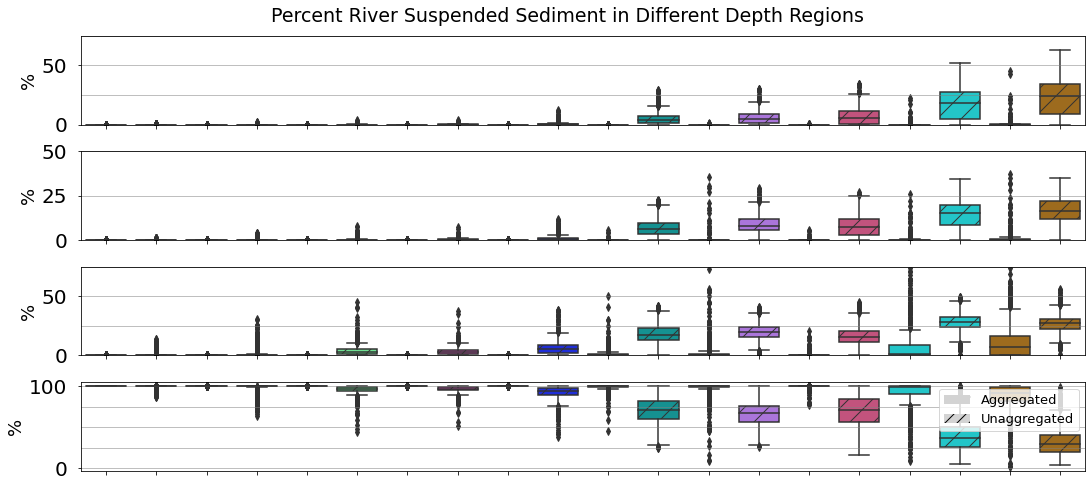

In [18]:
# Plot box and whiskers with one panel for each depth region and both aggregated
# and unaggregated mud for all 10 rivers in each panel...(chaos oops)

# Make the figure 
fig2, ax2 = plt.subplots(4, figsize=(18,8)) # 18, 8

# Plot the data as a boxplot
s4 = sns.boxplot(data=river_sed_percent_0_10m, ax=ax2[3], palette=river_pallette_colors_doubles)
s5 = sns.boxplot(data=river_sed_percent_10_20m, ax=ax2[2], palette=river_pallette_colors_doubles)
s6 = sns.boxplot(data=river_sed_percent_20_30m, ax=ax2[1], palette=river_pallette_colors_doubles)
s7 = sns.boxplot(data=river_sed_percent_30_60m, ax=ax2[0], palette=river_pallette_colors_doubles)

# Set hatches to the second/unaggregated data
#hatches = ["/", "o", "*", "\\", "/", "o", "*", "\\", "/", "o", "*", "\\", "/", "o", "*"]
# Set the hatch
hatches = ["/"]
# Loop through patches for sections 1 - 7 
for i, patch in enumerate(ax2[0].patches):
    # Apply to every other box
    if i % 2 == 1:  
        patch.set_hatch(hatches[i // 2 % len(hatches)])  
# Loop through patches for sections 8 - 13 
for i, patch in enumerate(ax2[1].patches):
    # Apply to every other box
    if i % 2 == 1:  
        patch.set_hatch(hatches[i // 2 % len(hatches)])  
for i, patch in enumerate(ax2[2].patches):
    # Apply to every other box
    if i % 2 == 1:  
        patch.set_hatch(hatches[i // 2 % len(hatches)]) 
for i, patch in enumerate(ax2[3].patches):
    # Apply to every other box
    if i % 2 == 1:  
        patch.set_hatch(hatches[i // 2 % len(hatches)]) 

# All
#ax2[0].set_xticklabels(['Agg.1', 'Unag.1', 'Agg.2', 'Unag.2', 'Agg.3', 'Unag.3',
    #                    'Agg.4', 'Unag.4', 'Agg.5', 'Unag.5', 'Agg.6', 'Unag.6',
     #                   'Agg.7', 'Unag.7'])
#ax2[0].set_xticklabels(['Sec', '1', 'Sec', '2', 'Sec', '3',
 #                   'Sec', '4', 'Sec', '5', 'Sec', '6',
  #                  'Sec', '7'])
#ax2[1].set_xticklabels(['Agg.8', 'Unag.8', 'Agg.9', 'Unag.9', 'Agg.10', 'Unag.10',
 #                       'Agg.11', 'Unag.11', 'Agg.12', 'Unag.12', 'Agg.13', 'Unag.13'])


plt.setp(ax2[0].get_xticklabels(), visible=False)
plt.setp(ax2[1].get_xticklabels(), visible=False)
plt.setp(ax2[2].get_xticklabels(), visible=False)
plt.setp(ax2[3].get_xticklabels(), visible=False)

#ax2[1].set_xlabel('Section', fontsize=fontsize-2)
ax2[0].set_ylabel('%', fontsize=fontsize-2)
ax2[1].set_ylabel('%', fontsize=fontsize-2)
ax2[2].set_ylabel('%', fontsize=fontsize-2)
ax2[3].set_ylabel('%', fontsize=fontsize-2)
fig2.suptitle('Percent River Suspended Sediment in Different Depth Regions', x=0.5, y=0.93, fontsize=fontsize-1)
#ax2[0].set_title('Aggregated', fontsize=fontsize-2)
#ax2[1].set_title('Unaggregated', fontsize=fontsize-2)

# Adjust the spacing 
fig2.subplots_adjust(hspace=0.30)

# Set some ylims 
ax2[0].set_ylim(0,75)
ax2[1].set_ylim(0,50)
ax2[2].set_ylim(0,75)


# Manually place section labels 
# fig2.text(0.19, 0.08, 'Section 1', color=seabed_section_colors[0], fontsize=fontsize-1, weight='bold')
# fig2.text(0.38, 0.08, 'Section 2', color=seabed_section_colors[1], fontsize=fontsize-1, weight='bold')
# fig2.text(0.57, 0.08, 'Section 3', color=seabed_section_colors[2], fontsize=fontsize-1, weight='bold')
# fig2.text(0.76, 0.08, 'Section 4', color=seabed_section_colors[3], fontsize=fontsize-1, weight='bold')

# fig2.text(0.19, 0.35, 'Section 5', color=seabed_section_colors[4], fontsize=fontsize-1, weight='bold')
# fig2.text(0.38, 0.35, 'Section 6', color=seabed_section_colors[5], fontsize=fontsize-1, weight='bold')
# fig2.text(0.57, 0.35, 'Section 7', color=seabed_section_colors[6], fontsize=fontsize-1, weight='bold')
# fig2.text(0.76, 0.35, 'Section 8', color=seabed_section_colors[7], fontsize=fontsize-1, weight='bold')

# fig2.text(0.19, 0.62, 'Section 9', color=seabed_section_colors[8], fontsize=fontsize-1, weight='bold')
# fig2.text(0.38, 0.62, 'Section 10', color=seabed_section_colors[9], fontsize=fontsize-1, weight='bold')
# fig2.text(0.57, 0.62, 'Section 11', color=seabed_section_colors[10], fontsize=fontsize-1, weight='bold')
# fig2.text(0.76, 0.62, 'Section 12', color=seabed_section_colors[11], fontsize=fontsize-1, weight='bold')

# Make a legend
# Create the custom legend entries
solid_fill_patch = mpatches.Patch(facecolor='lightgray', label='Aggregated')
hatched_fill_patch = mpatches.Patch(facecolor='lightgray', hatch='//', label='Unaggregated')
plt.legend(s4, handles=[solid_fill_patch, hatched_fill_patch], fontsize=fontsize-7, loc='upper right')

# Add bars for 25, 50, 75 percent
ax2[0].axhline(y=0, linestyle='-', color='gray', linewidth=0.5)
ax2[0].axhline(y=25, linestyle='-', color='gray', linewidth=0.5)
ax2[0].axhline(y=50, linestyle='-', color='gray', linewidth=0.5)
ax2[0].axhline(y=75, linestyle='-', color='gray', linewidth=0.5)
ax2[0].axhline(y=100, linestyle='-', color='gray', linewidth=0.5)

ax2[1].axhline(y=0, linestyle='-', color='gray', linewidth=0.5)
ax2[1].axhline(y=25, linestyle='-', color='gray', linewidth=0.5)
ax2[1].axhline(y=50, linestyle='-', color='gray', linewidth=0.5)
ax2[1].axhline(y=75, linestyle='-', color='gray', linewidth=0.5)
ax2[1].axhline(y=100, linestyle='-', color='gray', linewidth=0.5)

ax2[2].axhline(y=0, linestyle='-', color='gray', linewidth=0.5)
ax2[2].axhline(y=25, linestyle='-', color='gray', linewidth=0.5)
ax2[2].axhline(y=50, linestyle='-', color='gray', linewidth=0.5)
ax2[2].axhline(y=75, linestyle='-', color='gray', linewidth=0.5)
ax2[2].axhline(y=100, linestyle='-', color='gray', linewidth=0.5)

ax2[3].axhline(y=0, linestyle='-', color='gray', linewidth=0.5)
ax2[3].axhline(y=25, linestyle='-', color='gray', linewidth=0.5)
ax2[3].axhline(y=50, linestyle='-', color='gray', linewidth=0.5)
ax2[3].axhline(y=75, linestyle='-', color='gray', linewidth=0.5)
ax2[3].axhline(y=100, linestyle='-', color='gray', linewidth=0.5)

In [19]:
print(enumerate(ax2[0].patches))

In [20]:
# Chat GPT things

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Step 1: Function to flatten data
def flatten_for_boxplot(data_list, labels, depth_label):
    flat_data = []
    flat_labels = []
    depth_labels = []
    for i, series in enumerate(data_list):
        flat_data.extend(series.values.tolist())  # <-- fix is here
        flat_labels.extend([labels[i]] * len(series))
        depth_labels.extend([depth_label] * len(series))
    return pd.DataFrame({'value': flat_data, 'label': flat_labels, 'depth': depth_labels})

# Step 2: Your data and labels
depth_bins = [
    ("5 - 10 m", river_sed_percent_0_10m),
    ("10 - 20 m", river_sed_percent_10_20m),
    ("20 - 30 m", river_sed_percent_20_30m),
    ("30 - 60 m", river_sed_percent_30_60m)
]

# Assuming you have 10 sites and each has Agg + Unag
num_sites = len(river_sed_percent_0_10m) // 2
labels = [f"Agg.{i+1}" if j % 2 == 0 else f"Unag.{i+1}" for i in range(num_sites) for j in range(2)]

# Step 3: Combine all data
all_df = pd.concat(
    [flatten_for_boxplot(data_list, labels, depth) for depth, data_list in depth_bins],
    ignore_index=True
)

/projects/brun1463/software/anaconda/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:81: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


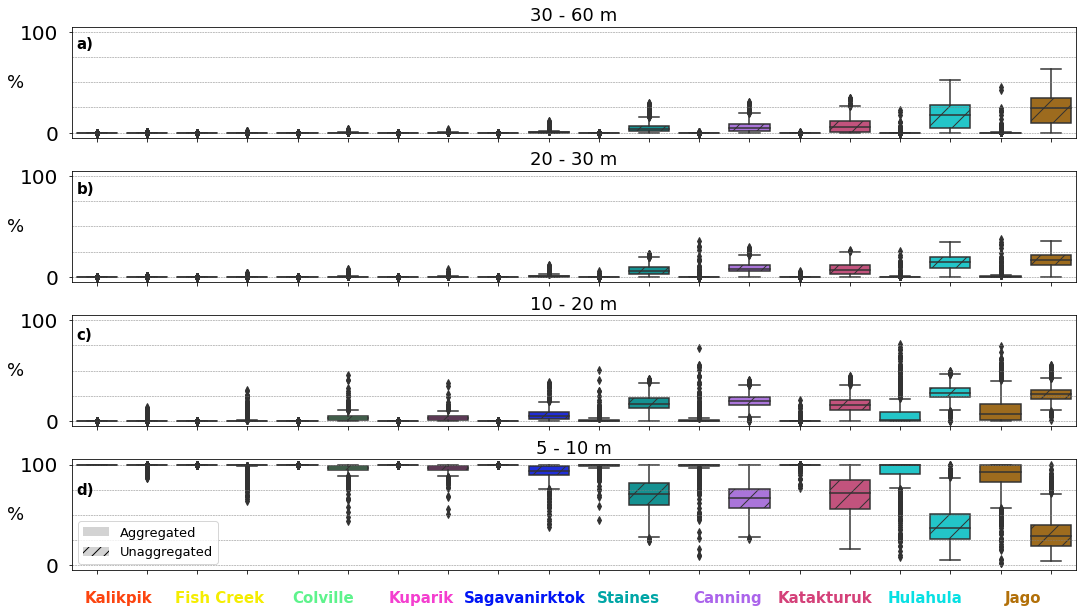

In [21]:
# CHat GPT things 
# Step 4: Create the figure and subplots
fig2, ax2 = plt.subplots(4, figsize=(18, 10), sharex=True)

# Plot each depth bin in the correct subplot
for i, (depth, _) in enumerate(depth_bins[::-1]):  # reverse so 0-10m is at bottom
    ax = ax2[i]
    df_depth = all_df[all_df['depth'] == depth]
    sns.boxplot(data=df_depth, x='label', y='value', ax=ax, palette=river_pallette_colors_doubles)

    # Optional: Add hatching to Unag entries
    for j, patch in enumerate(ax.patches):
        if 'Unag' in df_depth['label'].unique()[j]:
            patch.set_hatch('/')

    ax.set_ylabel('%', fontsize=fontsize-2, rotation=0, va='center')
    ax.set_ylim(-5, 105)
    ax.axhline(y=0, linestyle='--', color='gray', linewidth=0.5)
    ax.axhline(y=25, linestyle='--', color='gray', linewidth=0.5)
    ax.axhline(y=50, linestyle='--', color='gray', linewidth=0.5)
    ax.axhline(y=75, linestyle='--', color='gray', linewidth=0.5)
    ax.axhline(y=100, linestyle='--', color='gray', linewidth=0.5)
    ax.set_xlabel('')
    plt.setp(ax.get_xticklabels(), visible=False)
    ax.set_title(depth, fontsize=fontsize-2)

# Set hatches to the second/unaggregated data
#hatches = ["/", "o", "*", "\\", "/", "o", "*", "\\", "/", "o", "*", "\\", "/", "o", "*"]
# # Set the hatch
# hatches = ["/"]
# # Loop through patches for sections 1 - 7 
# for i, patch in enumerate(ax2[0].patches):
#     # Apply to every other box
#     if i % 2 == 1:  
#         patch.set_hatch(hatches[i // 2 % len(hatches)])  
# # Loop through patches for sections 8 - 13 
# for i, patch in enumerate(ax2[1].patches):
#     # Apply to every other box
#     if i % 2 == 1:  
#         patch.set_hatch(hatches[i // 2 % len(hatches)])  
# for i, patch in enumerate(ax2[2].patches):
#     # Apply to every other box
#     if i % 2 == 1:  
#         patch.set_hatch(hatches[i // 2 % len(hatches)]) 
# for i, patch in enumerate(ax2[3].patches):
#     # Apply to every other box
#     if i % 2 == 1:  
#         patch.set_hatch(hatches[i // 2 % len(hatches)]) 

#ig2.suptitle('Percent River Suspended Sediment in Different Depth Regions', x=0.5, y=0.93, fontsize=fontsize-1)
#ax2[0].set_title('Aggregated', fontsize=fontsize-2)
#ax2[1].set_title('Unaggregated', fontsize=fontsize-2)

# Adjust the spacing 
fig2.subplots_adjust(hspace=0.30)


# Manually place river labels 
fig2.text(0.135, 0.08, 'Kalikpik', color=river_pallette_colors_doubles[0], fontsize=fontsize-5, weight='bold')
fig2.text(0.205, 0.08, 'Fish Creek', color=river_pallette_colors_doubles[2], fontsize=fontsize-5, weight='bold')
fig2.text(0.295, 0.08, 'Colville', color=river_pallette_colors_doubles[4], fontsize=fontsize-5, weight='bold')
fig2.text(0.370, 0.08, 'Kuparik', color=river_pallette_colors_doubles[6], fontsize=fontsize-5, weight='bold')
fig2.text(0.428, 0.08, 'Sagavanirktok', color=river_pallette_colors_doubles[8], fontsize=fontsize-5, weight='bold')
fig2.text(0.530, 0.08, 'Staines', color=river_pallette_colors_doubles[10], fontsize=fontsize-5, weight='bold')
fig2.text(0.605, 0.08, 'Canning', color=river_pallette_colors_doubles[12], fontsize=fontsize-5, weight='bold')
fig2.text(0.670, 0.08, 'Katakturuk', color=river_pallette_colors_doubles[14], fontsize=fontsize-5, weight='bold')
fig2.text(0.755, 0.08, 'Hulahula', color=river_pallette_colors_doubles[16], fontsize=fontsize-5, weight='bold')
fig2.text(0.845, 0.08, 'Jago', color=river_pallette_colors_doubles[18], fontsize=fontsize-5, weight='bold')

# Add subplot labels 
fig2.text(0.129, 0.850, 'a)', color='black', fontsize=fontsize-5, weight='bold')
fig2.text(0.129, 0.648, 'b)', color='black', fontsize=fontsize-5, weight='bold')
fig2.text(0.129, 0.445, 'c)', color='black', fontsize=fontsize-5, weight='bold')
fig2.text(0.129, 0.230, 'd)', color='black', fontsize=fontsize-5, weight='bold')


# Make a legend
# Create the custom legend entries
solid_fill_patch = mpatches.Patch(facecolor='lightgray', label='Aggregated')
hatched_fill_patch = mpatches.Patch(facecolor='lightgray', hatch='//', label='Unaggregated')
plt.legend(s4, handles=[solid_fill_patch, hatched_fill_patch], fontsize=fontsize-7, loc='lower left')


plt.show()

# Stats! 
Calculate some stats to put in the paper!

In [101]:
np.shape(riv_sed_percent_agg.percent_0_10m_col)

(738,)

In [103]:
# Percent of suspended mud from Colville River in 0 - 10 m
# depth, mean and standard deviation over time
# Aggregated
mean_col_agg_0_10m = np.mean(riv_sed_percent_agg.percent_0_10m_col)
print('mean_col_agg_0_10m: ', mean_col_agg_0_10m)
std_col_agg_0_10m = np.std(riv_sed_percent_agg.percent_0_10m_col)
print('std_col_agg_0_10m: ', std_col_agg_0_10m)

# Unaggregated
mean_col_unag_0_10m = np.mean(riv_sed_percent_unag.percent_0_10m_col)
print('mean_col_unag_0_10m: ', mean_col_unag_0_10m)
std_col_unag_0_10m = np.std(riv_sed_percent_unag.percent_0_10m_col)
print('std_col_unag_0_10m: ', std_col_unag_0_10m)

mean_col_agg_0_10m:  <xarray.DataArray 'percent_0_10m_col' ()> Size: 8B
array(99.99999999)
std_col_agg_0_10m:  <xarray.DataArray 'percent_0_10m_col' ()> Size: 8B
array(7.81530895e-08)
mean_col_unag_0_10m:  <xarray.DataArray 'percent_0_10m_col' ()> Size: 8B
array(95.24308015)
std_col_unag_0_10m:  <xarray.DataArray 'percent_0_10m_col' ()> Size: 8B
array(5.87354725)


In [104]:
# Percent of suspended mud from Jago River in 10 - 60 m
# depth, mean and standard deviation over time
# Aggregated
jag_agg_10_60 = riv_sed_percent_agg.percent_10_20m_jag + riv_sed_percent_agg.percent_20_30m_jag + riv_sed_percent_agg.percent_30_60m_jag
mean_jag_agg_10_60m = np.mean(jag_agg_10_60)
print('mean_jag_agg_10_60m: ', mean_jag_agg_10_60m)
std_jag_agg_10_60m = np.std(jag_agg_10_60)
print('std_jag_agg_10_60m: ', std_jag_agg_10_60m)

# Unaggregated
jag_unag_10_60 = riv_sed_percent_unag.percent_10_20m_jag + riv_sed_percent_unag.percent_20_30m_jag + riv_sed_percent_unag.percent_30_60m_jag
mean_jag_unag_10_60m = np.mean(jag_unag_10_60)
print('mean_jag_unag_10_60m: ', mean_jag_unag_10_60m)
std_jag_unag_10_60m = np.std(jag_unag_10_60)
print('std_jag_unag_10_60m: ', std_jag_unag_10_60m)

mean_jag_agg_10_60m:  <xarray.DataArray ()> Size: 8B
array(13.43063422)
std_jag_agg_10_60m:  <xarray.DataArray ()> Size: 8B
array(17.93519)
mean_jag_unag_10_60m:  <xarray.DataArray ()> Size: 8B
array(67.07012329)
std_jag_unag_10_60m:  <xarray.DataArray ()> Size: 8B
array(19.29147761)
